In [22]:
%pip install gradio 


  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached tomlkit-0.13.2-py3-none-any.whl.metadata (2.7 kB)
  Using cached uvicorn-0.34.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/46.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/46.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/46.5 MB 1.3 MB/s eta 0:00:36
    --------------------------------------- 0.8/46.5 MB 1.5 MB/s eta 0:00:30
   - -------------------------------------- 1.3/46.5 MB 1.9 MB/s eta 0:00:25
   - -------------------------------------- 1.8/46.5 MB 1.9 MB/s eta 0:00:24
   -- ------------------------------------- 2.6/46.5 MB 2.3 MB/s eta 0:00:20
   -- ------------------------------------- 3.1/46.5 MB 2.4 MB/s eta 0:00:19
   --- ------------------------------------ 3.9/46


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
# Load the dataset
df = pd.read_csv("graduation_admission_data.csv")

# Display initial data insights
print("First 5 rows of the dataset:")
print(df.head())
print("*"*100)
print("\nDataset shape:", df.shape)
print("*"*100)
print("\nStatistical summary:")
print(df.describe())
print("*"*100)
print("\nData info:")
print(df.info())
print("*"*100)
print("\nMissing values:")
print(df.isnull().sum())
print("*"*100)

First 5 rows of the dataset:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
****************************************************************************************************

Dataset shape: (500, 9)
****************************************************************************************************

Statistical summary:
       Serial No.   GRE Score  TOEFL Score  University Rating      

In [11]:
# 2. Data Preprocessing
df.drop(columns=['Serial No.'], axis=1, inplace=True)
# Split features (X) and target (y)
X = df.iloc[:, 0:-1].values  # All columns except 'Chance of Admit'
y = df.iloc[:, -1].values    # 'Chance of Admit'

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (400, 7)
Testing set shape: (100, 7)


In [17]:
# 3. Model Building
model = Sequential([
    Dense(14, activation='relu', input_dim=X_train.shape[1]),  
    Dense(1, activation='linear')                           
])

# Display model summary
print("\nModel Summary:")
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


Model Summary:


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 14)             │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127 (508.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
# 4. Model Training
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.1)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7144 - val_loss: 1.0141
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7526 - val_loss: 0.4071
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2926 - val_loss: 0.2519
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2048 - val_loss: 0.2062
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1475 - val_loss: 0.1801
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1352 - val_loss: 0.1546
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1132 - val_loss: 0.1332
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1025 - val_loss: 0.1145
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0801 - val_loss: 0.0979
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0787 - val_loss: 0.0829
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0570 - val_loss: 0.0712
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0

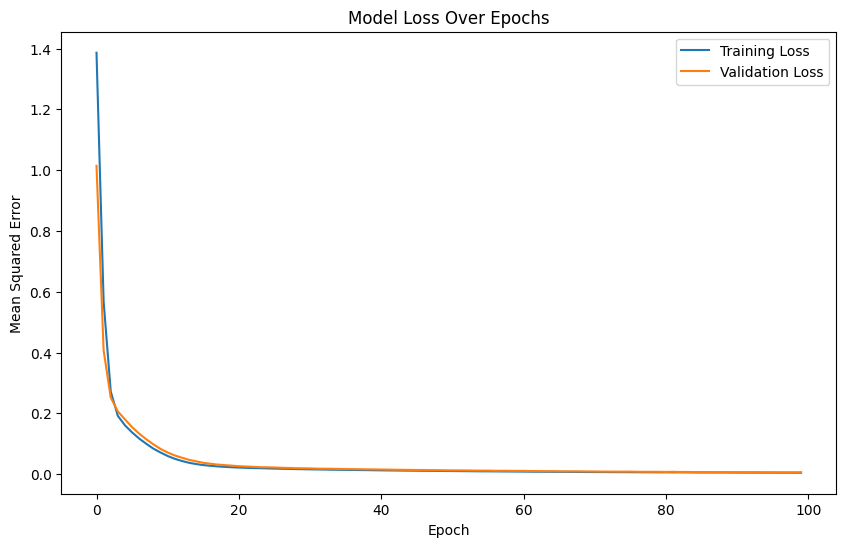

In [19]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
if 'val_loss' in history.history:
	plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [20]:
# 5. Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate regression metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("\nModel Evaluation:")
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

Model Evaluation:
R-squared Score: 0.6094
Mean Squared Error: 0.0064


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/200


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 1/23 ━━━━━━━━━━━━━━━━━━━━ 16s 734ms/step - loss: 0.1001 - mae: 0.2594

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0881 - mae: 0.2519 - val_loss: 0.0266 - val_mae: 0.1402
Epoch 2/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0358 - mae: 0.1671

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0312 - mae: 0.1514 - val_loss: 0.0094 - val_mae: 0.0853
Epoch 3/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0153 - mae: 0.1027

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0131 - mae: 0.0947 - val_loss: 0.0062 - val_mae: 0.0611
Epoch 4/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0111 - mae: 0.0874

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mae: 0.0751 - val_loss: 0.0061 - val_mae: 0.0619
Epoch 5/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0039 - mae: 0.0491

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0066 - mae: 0.0645 - val_loss: 0.0061 - val_mae: 0.0617
Epoch 6/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0126 - mae: 0.0930

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mae: 0.0670 - val_loss: 0.0057 - val_mae: 0.0591
Epoch 7/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0035 - mae: 0.0508

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mae: 0.0637 - val_loss: 0.0055 - val_mae: 0.0573
Epoch 8/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0054 - mae: 0.0608

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0060 - mae: 0.0621 - val_loss: 0.0052 - val_mae: 0.0554
Epoch 9/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0097 - mae: 0.0782

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - mae: 0.0622 - val_loss: 0.0051 - val_mae: 0.0546
Epoch 10/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0072 - mae: 0.0684 - val_loss: 0.0051 - val_mae: 0.0545
Epoch 11/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0039 - mae: 0.0564

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mae: 0.0623 - val_loss: 0.0049 - val_mae: 0.0529
Epoch 12/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0036 - mae: 0.0505

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mae: 0.0591 - val_loss: 0.0046 - val_mae: 0.0502
Epoch 13/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - mae: 0.0574 - val_loss: 0.0046 - val_mae: 0.0512
Epoch 14/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0057 - mae: 0.0586 - val_loss: 0.0049 - val_mae: 0.0525
Epoch 15/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - mae: 0.0494 - val_loss: 0.0046 - val_mae: 0.0498
Epoch 16/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0042 - mae: 0.0502

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - mae: 0.0527 - val_loss: 0.0045 - val_mae: 0.0505
Epoch 17/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0043 - mae: 0.0514

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - mae: 0.0565 - val_loss: 0.0044 - val_mae: 0.0491
Epoch 18/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0024 - mae: 0.0387

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mae: 0.0529 - val_loss: 0.0044 - val_mae: 0.0484
Epoch 19/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - mae: 0.0479 - val_loss: 0.0044 - val_mae: 0.0478
Epoch 20/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0054 - mae: 0.0557 - val_loss: 0.0046 - val_mae: 0.0507
Epoch 21/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0023 - mae: 0.0394

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mae: 0.0467 - val_loss: 0.0044 - val_mae: 0.0480
Epoch 22/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0020 - mae: 0.0379

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - mae: 0.0482 - val_loss: 0.0043 - val_mae: 0.0493
Epoch 23/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0068 - mae: 0.0650

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mae: 0.0568 - val_loss: 0.0042 - val_mae: 0.0473
Epoch 24/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - mae: 0.0542 - val_loss: 0.0044 - val_mae: 0.0494
Epoch 25/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mae: 0.0528 - val_loss: 0.0043 - val_mae: 0.0498
Epoch 26/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - mae: 0.0453 - val_loss: 0.0044 - val_mae: 0.0497
Epoch 27/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - mae: 0.0523 - val_loss: 0.0043 - val_mae: 0.0492
Epoch 28/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0052 - mae: 0.0538

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mae: 0.0500 - val_loss: 0.0042 - val_mae: 0.0479
Epoch 29/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - mae: 0.0499 - val_loss: 0.0042 - val_mae: 0.0477
Epoch 30/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - mae: 0.0509 - val_loss: 0.0043 - val_mae: 0.0495
Epoch 31/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mae: 0.0504 - val_loss: 0.0043 - val_mae: 0.0487
Epoch 32/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mae: 0.0460 - val_loss: 0.0043 - val_mae: 0.0483
Epoch 33/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mae: 0.0479 - val_loss: 0.0043 - val_mae: 0.0491
Epoch 34/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mae: 0.0472 - val_loss: 0.0043 - val_mae: 0.0489
Epoch 35/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0061 - mae: 0.0523

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mae: 0.0478 - val_loss: 0.0042 - val_mae: 0.0474
Epoch 36/200
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036 - mae: 0.0493

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mae: 0.0491 - val_loss: 0.0040 - val_mae: 0.0464
Epoch 37/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mae: 0.0491 - val_loss: 0.0041 - val_mae: 0.0466
Epoch 38/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041 - mae: 0.0479 - val_loss: 0.0041 - val_mae: 0.0464
Epoch 39/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - mae: 0.0418 - val_loss: 0.0042 - val_mae: 0.0481
Epoch 40/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mae: 0.0464 - val_loss: 0.0041 - val_mae: 0.0471
Epoch 41/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0040 - mae: 0.0473 - val_loss: 0.0041 - val_mae: 0.0471
Epoch 42/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0037 - mae: 0.0452 - val_loss: 0.0041 - val_mae: 0.0469
Epoch 43/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0041 - mae: 0.0481 - val_loss: 0.0042 - val_mae: 0.0475
Epoch 44/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 - 

R2 Score: 0.8106
RMSE: 0.0556


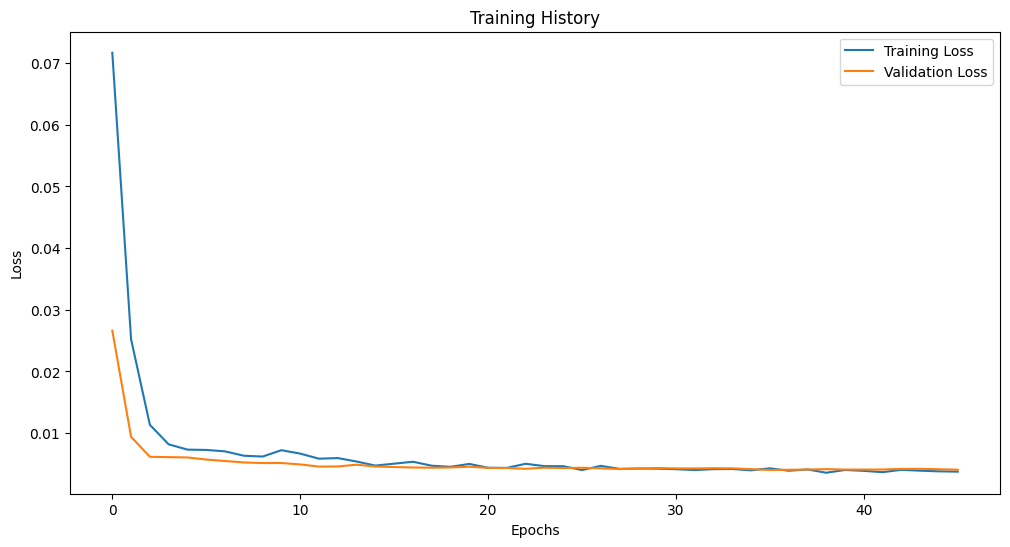

In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import gradio as gr
import joblib

# Load the dataset
df = pd.read_csv("graduation_admission_data.csv")

# Data Preprocessing
df.drop(columns=['Serial No.'], axis=1, inplace=True)

# Split features (X) and target (y)
X = df.iloc[:, :-1].values  # All columns except 'Chance of Admit'
y = df.iloc[:, -1].values    # 'Chance of Admit'

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Save the scaler for later use
joblib.dump(scaler, 'admission_scaler.pkl')

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Model Building with improved architecture
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Add callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_admission_model.h5', monitor='val_loss', save_best_only=True)

# Model Training
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    batch_size=16, 
    validation_split=0.1,
    callbacks=[early_stop, checkpoint]
)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Loss: {train_loss[0]:.4f}, Training MAE: {train_loss[1]:.4f}")
print(f"Testing Loss: {test_loss[0]:.4f}, Testing MAE: {test_loss[1]:.4f}")

# Make predictions
y_pred = model.predict(X_test).flatten()

# Calculate R2 score and RMSE
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# Save the final model
model.save('admission_model.h5')

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
